# Inferenza Bayesiana

## laboratorio di Python 

### Esperimento 1 - Inferenza Bayesiana

La  formula di Bayes descrive la probabilità condizionata di un evento A dato un evento B. La formula è la seguente:
$$    
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Il denominatore P(B) può essere calcolato nel seguente modo:
$$
P(B) = P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)
$$

Una possibile implementazione in Python della formula di Bayes è la seguente:


In [1]:
def bayes_theorem(p_a, p_b_dato_a, p_b_dato_not_a):
  # Calcola la probabilità di B dato A
  p_a_dato_b = (p_b_dato_a * p_a) / (p_b_dato_a * p_a + p_b_dato_not_a * (1 - p_a))
  return p_a_dato_b


Proviamo ad applicare la formula a un semplice caso penale. Immaginiamo di avere le seguenti informazioni:

- P(condanna) = 0.1;
- P(precedenti|condanna) = 0.8;
- P(precedenti|non condanna) = 0.1;

Calcoliamo la probabilità di condanna dato che ci sono precedenti penali.

In [2]:
# Esempio di applicazione al caso penale
# Probabilità a priori
p_precedenti = 0.2  # P(precedenti)
p_condanna = 0.1    # P(condanna)
p_precedenti_dato_condanna = 0.8  # P(precedenti|condanna)

# Calcolo della probabilità di condanna dato che ci sono precedenti
p_condanna_dato_precedenti = bayes_theorem(
    p_a=p_condanna,
    p_b_dato_a=p_precedenti_dato_condanna,
    p_b_dato_not_a=0.1  # P(precedenti|non condanna)
)
fattore_bayes = p_condanna_dato_precedenti / p_condanna
# Stampa i risultati
print(f"La probabilità di condanna a priori è: {p_condanna:.1%}")
print(f"La probabilità di condanna dato che ci sono precedenti penali è: {p_condanna_dato_precedenti:.1%}")
print(f"Il fattore di Bayes è: {fattore_bayes:.2f}")
print(f"Quindi il fatto di sapere che l'imputato ha precedenti penali moltiplica di {fattore_bayes:.2f} volte la probabilità di condanna!")

La probabilità di condanna a priori è: 10.0%
La probabilità di condanna dato che ci sono precedenti penali è: 47.1%
Il fattore di Bayes è: 4.71
Quindi il fatto di sapere che l'imputato ha precedenti penali moltiplica di 4.71 volte la probabilità di condanna!


### Esperimento 2 - Reti bayesiane

Scriviamo insieme il codice Python necessario per creare un modello di Rete Bayesiana per analizzare la probabilità di colpevolezza di un sospetto in un'indagine criminale. 
Tenendo conto del fatto che i modelli sono sempre un'approssimazione del mondo reale, si può utilizzare la teoria delle reti di Bayes per modellare la probabilità di un evento in base a vari fattori di prova.
Il modello considera solo tre elementi di prova: la presenza di un'arma (Arma), un movente (Movente) e un alibi (Alibi), e come questi influenzano la probabilità di colpevolezza (Colpevolezza).

Il codice non richiederà input diretti dall'utente. Invece, definisce la struttura della Rete Bayesiana e imposta le tabelle di probabilità per ciascun fattore basate su valori predefiniti che dovrebbero essere estrapolati da statistiche sulle indagini criminali.

**Descrizione del codice**

L'output di questo codice è:

- un modello di Rete Bayesiana verificato;
- la stampa del modello;
- la stampa delle Distribuzioni di Probabilità Condizionata (CPD) per ogni variabile nella rete;
- il grafo della rete Bayesiana.

Inizialmente, definiamo la struttura della Rete Bayesiana, mostrando come i fattori di prova (Arma, Movente, Alibi) influenzano la colpevolezza (Colpevolezza).
Quindi, definiamo le tabelle di probabilità per ciascun fattore. Ad esempio, la probabilità che un'arma sia presente sia presente sul luogo del delitto la poniamo pari al 70% (0.7) e la sua assenza al 30% (0.3). Più complessa è la definizione della tabella di probabilità per la colpevolezza, che considera tutte le possibili combinazioni dei fattori di prova.
Tutte queste tabelle sono aggiunte al modello di Rete Bayesiana.
Infine, verifichiamo se il modello è definito correttamente e stampiamo tutte le distribuzioni di probabilità.

La logica chiave in questo codice è come esso rappresenta le relazioni tra diversi elementi di prova e la colpevolezza. Ad esempio, la presenza di un'arma, un movente e la mancanza di un alibi aumenterebbero la probabilità di colpevolezza, mentre la loro assenza la diminuirebbe. Questo è riflesso nella tabella di probabilità per 'Colpevolezza', che considera tutte le possibili combinazioni di prove:

| Arma | Motivo | Alibi | P(Non Colpevole) | P(Colpevole) |
|------|--------|-------|------------------|--------------|
|  0   |   0    |   0   |       0.9        |     0.1      |
|  0   |   0    |   1   |       0.99       |     0.01     |
|  0   |   1    |   0   |       0.7        |     0.3      |
|  0   |   1    |   1   |       0.79       |     0.21     |
|  1   |   0    |   0   |       0.5        |     0.5      |
|  1   |   0    |   1   |       0.59       |     0.41     |
|  1   |   1    |   0   |       0.2        |     0.8      |
|  1   |   1    |   1   |       0.1        |     0.9      |

In questa tabella:

- 0 rappresenta l'assenza (di arma, movente o alibi)
- 1 rappresenta la presenza

Le ultime due colonne mostrano le probabilità di non colpevolezza e colpevolezza per ogni combinazione di evidenze

Questa Rete Bayesiana può essere utilizzata per calcolare la probabilità di colpevolezza dato uno scenario di prove, aiutando gli inquirenti a quantificare e ragionare sull'incertezza nei casi criminali.

::: {.callout-caution}
Se non abbiamo mai installato le librerie pgmpy, networkx e matplotlib, l'interprete Python segnalerà che pgmpy non è riconosciuta. In questo caso è necessario installare le librerie necessarie eseguendo il seguente blocco di codice:
```
!pip install pgmpy networkx matplotlib
```

:::

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Definizione del modello
model = BayesianNetwork([('Arma', 'Colpevolezza'),
                       ('Movente', 'Colpevolezza'),
                       ('Alibi', 'Colpevolezza')])

# Definizione delle probabilità condizionate
cpd_arma = TabularCPD(variable='Arma', variable_card=2,
                      values=[[0.7], [0.3]])
cpd_Movente = TabularCPD(variable='Movente', variable_card=2,
                        values=[[0.6], [0.4]])
cpd_alibi = TabularCPD(variable='Alibi', variable_card=2,
                       values=[[0.5], [0.5]])
cpd_colpevolezza = TabularCPD(variable='Colpevolezza', variable_card=2,
                              values=[[0.1, 0.01, 0.3, 0.21, 0.5, 0.41, 0.8, 0.9],
                                      [0.9, 0.99, 0.7, 0.79, 0.5, 0.59, 0.2, 0.1]],
                              evidence=['Arma', 'Movente', 'Alibi'],
                              evidence_card=[2, 2, 2])

# Aggiunta delle probabilità condizionate al modello
model.add_cpds(cpd_arma, cpd_Movente, cpd_alibi, cpd_colpevolezza)

# Verifica del modello
print("Il modello è corretto: ", model.check_model())

# Stampa del modello
for cpd in model.get_cpds():
    print("CPD di {variable}:".format(variable=cpd.variable))
    print(cpd)

Il modello è corretto:  True
CPD di Arma:
+---------+-----+
| Arma(0) | 0.7 |
+---------+-----+
| Arma(1) | 0.3 |
+---------+-----+
CPD di Movente:
+------------+-----+
| Movente(0) | 0.6 |
+------------+-----+
| Movente(1) | 0.4 |
+------------+-----+
CPD di Alibi:
+----------+-----+
| Alibi(0) | 0.5 |
+----------+-----+
| Alibi(1) | 0.5 |
+----------+-----+
CPD di Colpevolezza:
+-----------------+------------+-----+------------+------------+
| Arma            | Arma(0)    | ... | Arma(1)    | Arma(1)    |
+-----------------+------------+-----+------------+------------+
| Movente         | Movente(0) | ... | Movente(1) | Movente(1) |
+-----------------+------------+-----+------------+------------+
| Alibi           | Alibi(0)   | ... | Alibi(0)   | Alibi(1)   |
+-----------------+------------+-----+------------+------------+
| Colpevolezza(0) | 0.1        | ... | 0.8        | 0.9        |
+-----------------+------------+-----+------------+------------+
| Colpevolezza(1) | 0.9        |

Possiamo anche visualizzare la rete di Bayes con il seguente codice:

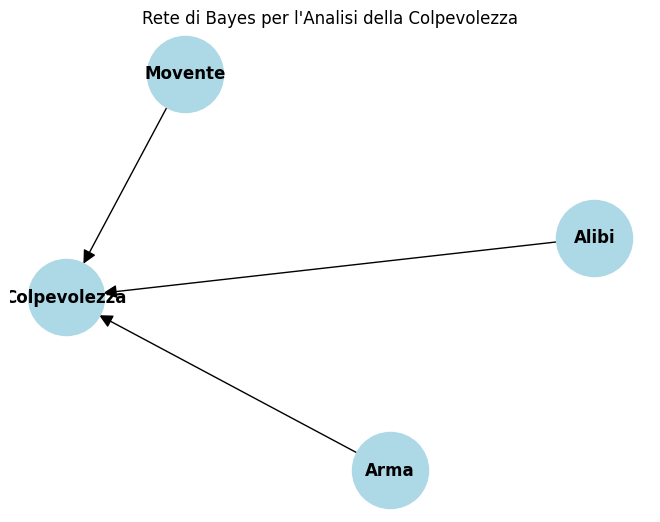

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Assumendo che 'model' sia il tuo BayesianNetwork già definito
G = nx.DiGraph()
G.add_edges_from(model.edges())

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, arrowsize=20, font_size=12, font_weight='bold')

plt.title("Rete di Bayes per l'Analisi della Colpevolezza")
plt.axis('off')
plt.show()

Infine, una volta costruita la rete di Bayes possiamo interrogarla per avere una stima della probabilità di un determinato evento.
Qual è la probabiltà che un indagato senza alibi, senza movente e in assenza di arma del delitto sia colpevole?

In [5]:
from pgmpy.inference import VariableElimination

# Creiamo un oggetto per l'inferenza
inference = VariableElimination(model)

# Definiamo l'evidenza per la situazione descritta
evidence = {
    'Alibi': 0,  # 0 rappresenta l'assenza di alibi
    'Movente': 0, # 0 rappresenta l'assenza di motivo
    'Arma': 0    # 0 rappresenta che l'arma non è stata trovata
}

# Calcoliamo la probabilità di colpevolezza dato l'evidenza
result = inference.query(['Colpevolezza'], evidence=evidence)

# Stampiamo il risultato
print("Probabilità di colpevolezza:")
print(result.values[0])
print("Probabilità di innocenza:")
print(result.values[1])

Probabilità di colpevolezza:
0.1
Probabilità di innocenza:
0.9


In [10]:
from pgmpy.inference import VariableElimination

# Creiamo un oggetto per l'inferenza
inference = VariableElimination(model)

# Definiamo l'evidenza per la situazione descritta
evidence = {
    'Alibi': 0,   # 1 rappresenta la presenza di alibi
    'Movente': 0, # 0 rappresenta l'assenza di motivo
    'Arma': 1     # 0 rappresenta che l'arma non è stata trovata
}

# Calcoliamo la probabilità di colpevolezza dato l'evidenza
result = inference.query(['Colpevolezza'], evidence=evidence)

# Stampiamo il risultato
print("Probabilità di colpevolezza:")
print(result.values[0])
print("Probabilità di innocenza:")
print(result.values[1])

Probabilità di colpevolezza:
0.5
Probabilità di innocenza:
0.5
